In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import poisson
from scipy.stats import norm


## Table of Contents
1. [Principle of MLE](#principle-of-mle)
2. [Mathematical Formulation](#mathematical-formulation)
3. [Objective](#objective)
4. [Optimization](#optimization)
5. [Assumptions and Limitations](#assumptions-and-limitations)
6. [Applications](#applications)


# 1. Principle of MLE

Maximum Likelihood Estimation is a method used for estimating the parameters of a statistical model. Given a set of observations \( \mathbf{X} = \{x_1, x_2, \ldots, x_n\} \) and a parametric model \( f(x; \theta) \) that describes how the data is generated, MLE aims to find the parameter \( \theta \) that maximizes the likelihood function \( L(\theta; \mathbf{X}) \).


# 2. Mathematical Formulation

The likelihood function \( L(\theta; \mathbf{X}) \) is defined as the joint probability of observing the given data \( \mathbf{X} \) under the model parameterized by \( \theta \):

\[
L(\theta; \mathbf{X}) = P(\mathbf{X} | \theta) = \prod_{i=1}^{n} f(x_i; \theta)
\]

The MLE aims to find \( \theta \) that maximizes this likelihood function:

\[
\hat{\theta}_{MLE} = \arg \max_{\theta} L(\theta; \mathbf{X})
\]

Often, it is more convenient to work with the log-likelihood function, \( \ell(\theta; \mathbf{X}) \), which is the natural logarithm of the likelihood function:

\[
\ell(\theta; \mathbf{X}) = \log L(\theta; \mathbf{X}) = \sum_{i=1}^{n} \log f(x_i; \theta)
\]


# 3. Objective

The objective of MLE is to find the parameter \( \theta \) that makes the observed data most probable. In other words, MLE finds the parameter values that maximize the likelihood of making the observed data.


# 4. Optimization

The optimization is usually performed using iterative methods like Newton-Raphson or gradient-based methods like stochastic gradient descent, especially when dealing with high-dimensional data or complex models.


# 5. Assumptions and Limitations

- MLE assumes that the data is independently and identically distributed (i.i.d.).
- It may be sensitive to outliers.
- It may overfit the data if the model is too complex.


# 6. Applications

MLE is widely used in various fields including machine learning, economics, and natural sciences. In machine learning, it is commonly used for parameter estimation in models like logistic regression, Gaussian Mixture Models, and many others.


# 7. Practical examples

##  7.1 Practical Example of MLE with Gaussian Distribution

In this example, we'll generate some synthetic data from a Gaussian distribution and then use MLE to estimate its parameters (\( \mu \) and \( \sigma \)).


In [35]:
# Generate synthetic data
np.random.seed(0)
true_mean = 5
true_std = 2
n_samples = 1000

# Generate synthetic data
data = np.random.normal(true_mean, true_std, n_samples)


In [36]:
# Define the negative log-likelihood function
def neg_log_likelihood(params):
    mean, std = params
    nll = -np.sum(np.log(1 / (np.sqrt(2 * np.pi) * std)) + 
                  (-((data - mean) ** 2) / (2 * std ** 2)))
    return nll


In [37]:
# Perform MLE using optimization
initial_guess = [1, 1]
result = minimize(neg_log_likelihood, initial_guess, method='L-BFGS-B', bounds=[(None, None), (0.01, None)])

# Extract the MLE estimates
mle_mean, mle_std = result.x

In [38]:
# Cell 14: Display the results
print(f"True mean: {true_mean}, MLE estimated mean: {mle_mean}")
print(f"True standard deviation: {true_std}, MLE estimated standard deviation: {mle_std}")


True mean: 5, MLE estimated mean: 4.909486158422871
True standard deviation: 2, MLE estimated standard deviation: 1.9740659796590379


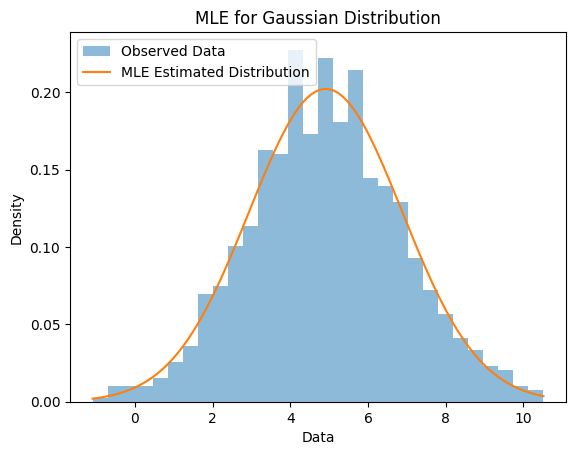

In [39]:
# Plot the data and the estimated Gaussian distribution
plt.hist(data, bins=30, density=True, alpha=0.5, label='Observed Data')

x = np.linspace(min(data), max(data), 100)
pdf = (1 / (mle_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mle_mean) / mle_std)**2)
plt.plot(x, pdf, label='MLE Estimated Distribution')

plt.title('MLE for Gaussian Distribution')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

##  7.2 Practical Example of MLE with Poisson Distribution


To understand how MLE can be used to estimate the parameter (\( \lambda \)) of a Poisson distribution using synthetic data.


In [40]:
# Generate synthetic data: To generate synthetic data from a Poisson distribution with a known lambda (3) for demonstration.
np.random.seed(1)
true_lambda = 3
n_samples = 1000
data_poisson = np.random.poisson(true_lambda, n_samples)



In [41]:
# Define the negative log-likelihood function :To define the negative log-likelihood function that we aim to minimize. This function computes the likelihood of observing the data given a lambda.
def neg_log_likelihood_poisson(lam):
    return -np.sum(poisson.logpmf(data_poisson, lam))



In [42]:
# Perform MLE to estimate lambda : To use optimization techniques to find the lambda that minimizes the negative log-likelihood, effectively maximizing the likelihood.
initial_guess = [1]
result_poisson = minimize(neg_log_likelihood_poisson, initial_guess, method='L-BFGS-B', bounds=[(0.01, None)])
mle_lambda = result_poisson.x[0]



In [43]:
# Display the estimated lambda : To compare the true lambda with the lambda estimated using MLE.
print(f"True lambda: {true_lambda}, MLE estimated lambda: {mle_lambda}")



True lambda: 3, MLE estimated lambda: 3.020000197432692


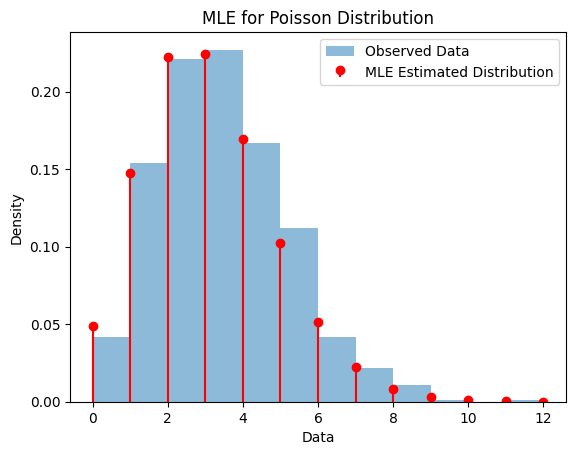

In [44]:
#  Plot the data and estimated distribution : To visualize how well the estimated Poisson distribution fits the synthetic data.
plt.hist(data_poisson, bins=range(0, max(data_poisson) + 1), density=True, alpha=0.5, label='Observed Data')
x_poisson = np.arange(0, max(data_poisson) + 1)
pmf_poisson = poisson.pmf(x_poisson, mle_lambda)
plt.stem(x_poisson, pmf_poisson, 'r', markerfmt='ro', basefmt=" ", linefmt='r', label='MLE Estimated Distribution')
plt.title('MLE for Poisson Distribution')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()



##  7.3 Practical Example MLE with Gaussian Distribution
 To demonstrate how MLE can be used to estimate the parameters (\( \mu \) and \( \sigma \)) of a Gaussian distribution using synthetic data.


In [45]:
# Generate synthetic data
# What: Generating synthetic data points from a Gaussian distribution.
# Why: To have a dataset for demonstrating MLE.
np.random.seed(2)
true_mu = 5
true_sigma = 2
n_samples = 100
data_gaussian = np.random.normal(true_mu, true_sigma, n_samples)


In [46]:
# Define the negative log-likelihood function for Gaussian
# What: Defining a function to calculate the negative log-likelihood of the Gaussian distribution.
# Why: We aim to minimize this function to find the best parameters (\( \mu \) and \( \sigma \)).
def neg_log_likelihood_gaussian(params):
    mu, sigma = params
    return -np.sum(norm.logpdf(data_gaussian, mu, sigma))


In [47]:
# Perform MLE to estimate mu and sigma
# What: Using optimization to find the parameters that minimize the negative log-likelihood.
# Why: The parameters that minimize the negative log-likelihood maximize the likelihood, making them our MLE estimates.
initial_guess = [1, 1]
result_gaussian = minimize(neg_log_likelihood_gaussian, initial_guess, method='L-BFGS-B', bounds=[(None, None), (0.01, None)])
mle_mu, mle_sigma = result_gaussian.x


In [48]:
# Display the estimated mu and sigma
# What: Printing the true and MLE-estimated parameters.
# Why: To show how close the MLE estimates are to the true parameters.
print(f"True mu: {true_mu}, MLE estimated mu: {mle_mu}")
print(f"True sigma: {true_sigma}, MLE estimated sigma: {mle_sigma}")


True mu: 5, MLE estimated mu: 4.792517661318108
True sigma: 2, MLE estimated sigma: 2.074071378404334


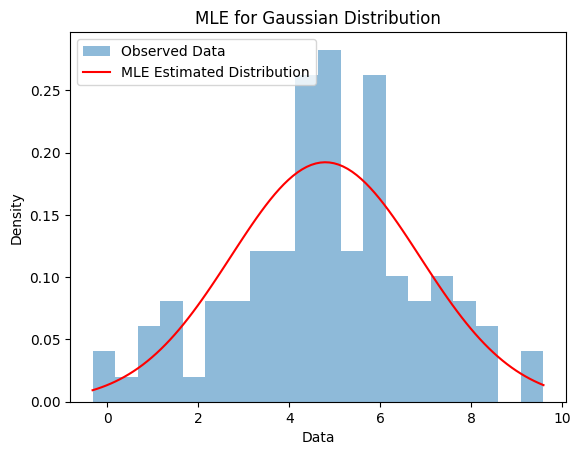

In [49]:
# Plot the data and estimated distribution
# What: Plotting the synthetic data and the Gaussian distribution estimated via MLE.
# Why: To visualize how well the MLE-estimated distribution fits the synthetic data.
plt.hist(data_gaussian, bins=20, density=True, alpha=0.5, label='Observed Data')
x_gaussian = np.linspace(min(data_gaussian), max(data_gaussian), 100)
pdf_gaussian = norm.pdf(x_gaussian, mle_mu, mle_sigma)
plt.plot(x_gaussian, pdf_gaussian, 'r', label='MLE Estimated Distribution')
plt.title('MLE for Gaussian Distribution')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()
